# <center>MANOJ KUMAR - 2048015</center>

### Requirement 
For the given anonymous dataset of size 199x35 perform the following task:
1. Exploratory Data analysis to study the nature of the data and to decide whether to follow a  parametric approach or non parametric approach for predicting the target.
2. Preprocessing
3. Dimensionality reduction
4. Model building
5. Model Evaluation



**NOTE: Register Number 1 to 20 will perform  prediction on column named predictLabel2(continuous value)**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

#Importing the visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data
MainDataset = pd.read_csv('AnonymousDataset.csv')
MainDataset.head(4)

,col1,classLabel,col3,col4,col5,col6,col7,col8,col9,col10,...,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel1,PredictLabel2
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0


<center><b>Regression predictive modeling problem</b></center>

## Perform Exploratory data analysis

In [3]:
MainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   col1           198 non-null    int64  
 1   classLabel     198 non-null    int64  
 2   col3           198 non-null    int64  
 3   col4           198 non-null    float64
 4   col5           198 non-null    float64
 5   col6           198 non-null    float64
 6   col7           198 non-null    float64
 7   col8           198 non-null    float64
 8   col9           198 non-null    float64
 9   col10          198 non-null    float64
 10  col11          198 non-null    float64
 11  col12          198 non-null    float64
 12  col13          198 non-null    float64
 13  col14          198 non-null    float64
 14  col15          198 non-null    float64
 15  col16          198 non-null    float64
 16  col17          198 non-null    float64
 17  col18          198 non-null    float64
 18  col19     

    Data columns (total 35 columns)  : Hidden column labels
    Non-Null Count                   : 35 columns having non-null entry
    dtypes                           : float64(31), int64(3), object(1)
    RangeIndex                       : 198 entries, 0 to 197
    memory usage                     : 54.3+ KB

In [4]:
print(f"Totally AnonymousDataset contains, {MainDataset.shape[1]} columns and {MainDataset.shape[0]} Rows")

Totally AnonymousDataset contains, 35 columns and 198 Rows


In [5]:
MainDataset.iloc[:,-1].unique()

array(['5', '2', '0', '?', '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '24', '18', '16', '21'],
      dtype=object)

- They provided a dataset with only 1 column under Object data type, which is a continuous value as per the requirement.
- Drilling PredictLabel2 values with unique() Predefined function and found PredictLabel2 contains Integer and some special characters *?*
- We assume it's a data acquisition Errors.


Missing values must be marked with NaN values and can be replaced with nearest neighbor estimated values.

In [6]:
Dataset=MainDataset.iloc[:,-1]
MainDataset.iloc[:,-1]=Dataset.replace('?',np.nan)
MainDataset.iloc[:,-1].unique()


array(['5', '2', '0', nan, '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '24', '18', '16', '21'],
      dtype=object)

- Missing numerical data are replaced and represented by numpy 'nan'

In [7]:
MainDataset.isnull().sum().sort_values(ascending=False)

PredictLabel2    4
col9             0
col15            0
col14            0
col13            0
col12            0
col11            0
col10            0
col8             0
col17            0
col7             0
col6             0
col5             0
col4             0
col3             0
classLabel       0
col16            0
col18            0
PredictLabel1    0
col27            0
col33            0
col32            0
col31            0
col30            0
col29            0
col28            0
col26            0
col19            0
col25            0
col24            0
col23            0
col22            0
col21            0
col20            0
col1             0
dtype: int64

- Checking null values after replacing '?' by NaN (NaN : Missing numerical data)
- There are 4 NaN values in the PredictLabel2 column, which perform prediction.

In [8]:
knn_impute=KNNImputer()
MainDataset['PredictLabel2']=np.around(knn_impute.fit_transform(MainDataset[['PredictLabel2']]))
MainDataset.iloc[:,-1]=MainDataset.iloc[:,-1].astype('int64')

In [9]:
MainDataset.head(9).T

,0,1,2,3,4,5,6,7,8
col1,119513.000000,8423.000000,842517.000000,843483.000000,843584.000000,843786.000000,844359.000000,844582.000000,844981.000000
classLabel,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
col3,31.000000,61.000000,116.000000,123.000000,27.000000,77.000000,60.000000,77.000000,119.000000
col4,18.020000,17.990000,21.370000,11.420000,20.290000,12.750000,18.980000,13.710000,13.000000
col5,27.600000,10.380000,17.440000,20.380000,14.340000,15.290000,19.610000,20.830000,21.820000
col6,117.500000,122.800000,137.500000,77.580000,135.100000,84.600000,124.400000,90.200000,87.500000
col7,1013.000000,1001.000000,1373.000000,386.100000,1297.000000,502.700000,1112.000000,577.900000,519.800000
col8,0.094890,0.118400,0.088360,0.142500,0.100300,0.118900,0.090870,0.118900,0.127300
col9,0.103600,0.277600,0.118900,0.283900,0.132800,0.156900,0.123700,0.164500,0.193200
col10,0.108600,0.300100,0.125500,0.241400,0.198000,0.166400,0.121300,0.093660,0.185900


The use of a KNN model to predict or fill missing values is referred to as “Nearest Neighbor Imputation”.

- “KNN imputation” implemented in PredictLabel2 to handle missing values.
- PredictLabel2 data types are converted to int64.

In [10]:
dataset = MainDataset
dataset = dataset.drop(['col1','PredictLabel1'], axis=1)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
classLabel,198.0,0.237374,0.426552,0.000000,0.000000,0.000000,0.000000,1.00000
col3,198.0,46.732323,34.462870,1.000000,14.000000,39.500000,72.750000,125.00000
col4,198.0,17.412323,3.161676,10.950000,15.052500,17.290000,19.580000,27.22000
col5,198.0,22.276010,4.298290,10.380000,19.412500,21.750000,24.655000,39.28000
col6,198.0,114.856566,21.383402,71.900000,98.160000,113.700000,129.650000,182.10000
col7,198.0,970.040909,352.149215,361.600000,702.525000,929.100000,1193.500000,2250.00000
col8,198.0,0.102681,0.012522,0.074970,0.093900,0.101900,0.110975,0.14470
col9,198.0,0.142648,0.049898,0.046050,0.110200,0.131750,0.172200,0.31140
col10,198.0,0.156243,0.070572,0.023980,0.106850,0.151350,0.200500,0.42680
col11,198.0,0.086776,0.033877,0.020310,0.063670,0.086075,0.103925,0.20120


- Since col1, PredictLabel1 are unique and unwanted columns for our prediction process.               
- Dropping col1 & PredictLabel1 from the dataset.

In [11]:
for i in dataset.columns:
    print(f'{i} \t \t \t : \t {dataset[i].nunique()} values')

classLabel 	 	 	 : 	 2 values
col3 	 	 	 : 	 95 values
col4 	 	 	 : 	 177 values
col5 	 	 	 : 	 193 values
col6 	 	 	 : 	 181 values
col7 	 	 	 : 	 192 values
col8 	 	 	 : 	 179 values
col9 	 	 	 : 	 192 values
col10 	 	 	 : 	 196 values
col11 	 	 	 : 	 189 values
col12 	 	 	 : 	 175 values
col13 	 	 	 : 	 194 values
col14 	 	 	 : 	 196 values
col15 	 	 	 : 	 191 values
col16 	 	 	 : 	 192 values
col17 	 	 	 : 	 196 values
col18 	 	 	 : 	 196 values
col19 	 	 	 : 	 193 values
col20 	 	 	 : 	 192 values
col21 	 	 	 : 	 187 values
col22 	 	 	 : 	 189 values
col23 	 	 	 : 	 195 values
col24 	 	 	 : 	 182 values
col25 	 	 	 : 	 187 values
col26 	 	 	 : 	 183 values
col27 	 	 	 : 	 191 values
col28 	 	 	 : 	 172 values
col29 	 	 	 : 	 191 values
col30 	 	 	 : 	 197 values
col31 	 	 	 : 	 185 values
col32 	 	 	 : 	 192 values
col33 	 	 	 : 	 189 values
PredictLabel2 	 	 	 : 	 22 values


We are finding unique values for the rest of the columns in the dataset.

- ClassLabel and PredictLabel2 contain the lowest unique values.
- Rest of the columns own float data, so there exists higher uniqueness in those columns.

In [12]:
numerical_features = []
categorical_features = []

for i in dataset.columns:
    if dataset[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        

print(len(numerical_features))
print(len(categorical_features))

32
1


In [13]:
# Numerical features:
print("Numerical features : ",numerical_features)

# Categorical features:
print("\n Categorical features : ",categorical_features)

Numerical features :  ['col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'PredictLabel2']

 Categorical features :  ['classLabel']


Numerical features and Categorical features are identified and stored in a separate python list.       

- numerical_features   = 32 columns
- categorical_features = 1 column

In [14]:
# checking for unique values in categorical features:

for feats in categorical_features:
    print(f'{feats} has {dataset[feats].unique()} categories.\n')

classLabel has [0 1] categories.



## Perform Data cleaning & Pre-processing

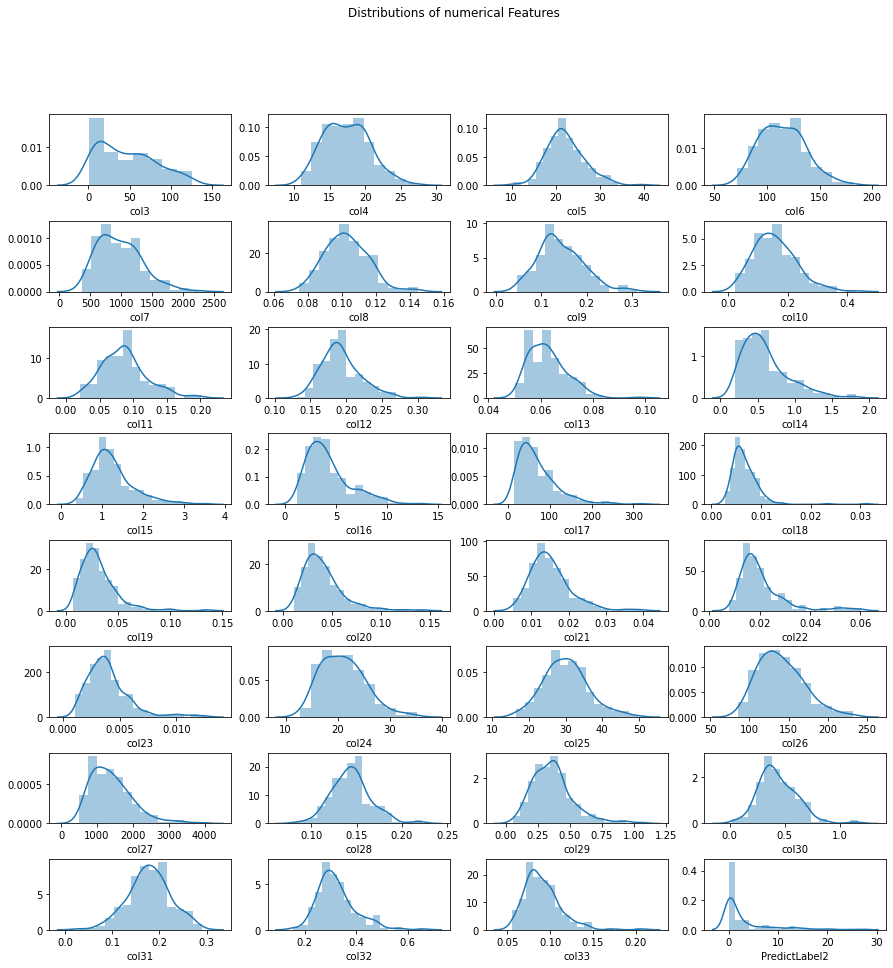

In [15]:
# Checking distribution of the numerical features:

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=dataset[feats], ax=ax)

Distributions of numerical Features

- In general, Row no. 1, 2, 6, 8 are appropriately distubuted normally.
- Also, Row no. 3, 4, 5 and 7 are right skewed. (Positive skewed data)
- PredictLabel2 does not consider to picture.

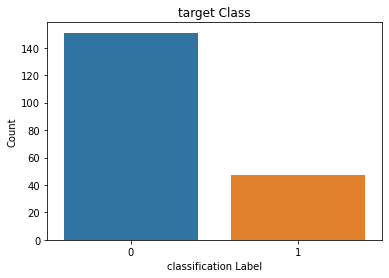

In [16]:
# Checking the label distribution for categorical data:

sns.countplot(x='classLabel',data=dataset)
plt.xlabel("classification Label")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

Distributions of categorical Features

- We have only one categorical feature named 'classLabel'
- 0 and 1 are the classification Label contain in the classLabel feature.
- 3/4th of the values dominates 0.  
- One is holding 1/4 of the values.

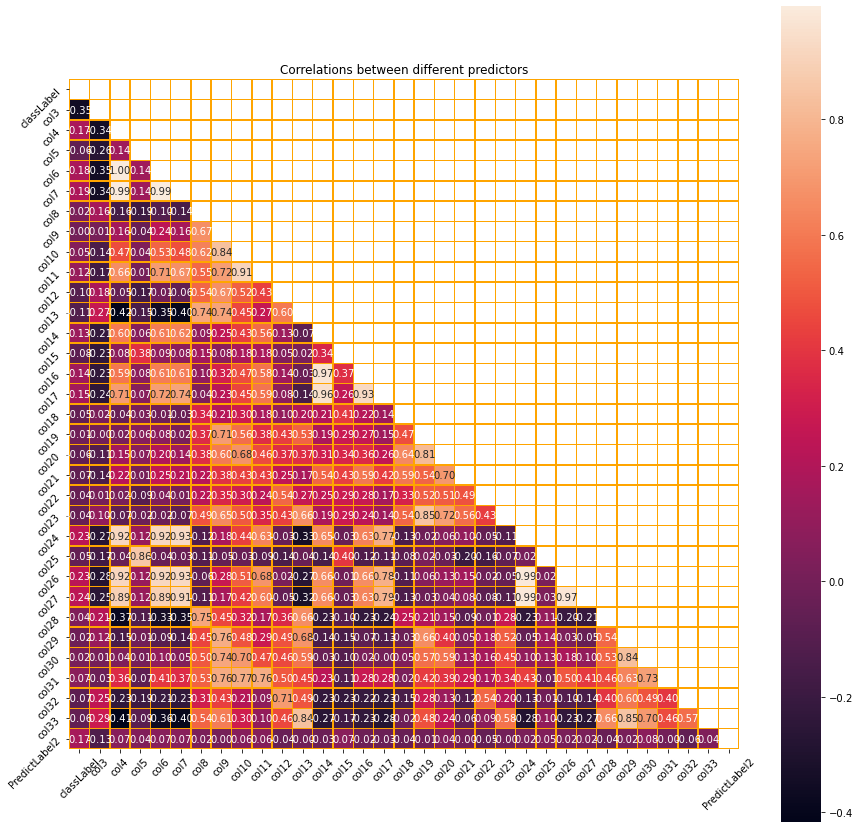

In [17]:
# Correlations between different predictors

corr_df = dataset.corr()

f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

Correlations between different predictors are not clear to the understanding. So, converting into understandable matrix format.

In [18]:
corr_df = dataset.corr()
corr_df
cm = sns.light_palette("black", as_cmap=True)
corr_df.style.background_gradient(cmap=cm)

,classLabel,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel2
classLabel,1.000000,-0.351326,0.174124,-0.064295,0.176486,0.189893,0.020778,0.000798,0.054893,0.118224,-0.099777,-0.112352,0.132512,-0.076212,0.141633,0.151826,-0.052213,-0.009537,-0.060379,-0.065570,-0.044325,-0.042751,0.233225,-0.051134,0.231998,0.235310,0.038520,-0.020067,0.017621,0.074345,-0.074731,-0.055170,0.167351
col3,-0.351326,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,0.177311,0.269992,-0.214543,-0.230477,-0.231621,-0.244159,0.019775,-0.002386,-0.108648,-0.140754,0.011156,0.099203,-0.265115,-0.171125,-0.280596,-0.253930,0.212769,0.120516,0.009546,-0.026541,0.247678,0.288715,-0.125745
col4,0.174124,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,-0.051610,-0.416674,0.602035,0.079693,0.588927,0.710586,-0.036419,0.023647,0.154254,0.224771,0.019146,-0.072618,0.924183,-0.039439,0.915053,0.891489,-0.372894,-0.150712,0.038952,0.357869,-0.232142,-0.414340,0.066319
col5,-0.064295,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,-0.165166,-0.145572,0.059168,0.382533,0.075025,0.068517,0.027119,0.063988,0.071920,0.010470,-0.094843,-0.020673,0.123028,0.862050,0.123674,0.117467,-0.113308,-0.006467,0.013635,-0.069921,-0.186850,-0.085847,0.042661
col6,0.176486,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,-0.006512,-0.353560,0.612708,0.092256,0.609964,0.718581,-0.011788,0.080725,0.202027,0.254473,0.038613,-0.019514,0.921552,-0.039728,0.923659,0.889344,-0.331667,-0.092041,0.096790,0.410000,-0.206949,-0.364022,0.067565
col7,0.189893,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,-0.060785,-0.397733,0.623019,0.084288,0.609887,0.740830,-0.032969,0.020395,0.144443,0.213582,0.009121,-0.071906,0.932381,-0.032122,0.925335,0.914166,-0.345111,-0.141358,0.046641,0.365026,-0.234294,-0.395026,0.067452
col8,0.020778,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,0.540761,0.744890,0.094728,0.153848,0.099518,0.037955,0.344678,0.372393,0.375011,0.223510,0.223723,0.486112,-0.115092,-0.106172,-0.064664,-0.106691,0.745400,0.447849,0.499438,0.531015,0.308964,0.535751,0.024576
col9,0.000798,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,0.666822,0.735474,0.251568,0.082994,0.318684,0.233326,0.212552,0.714122,0.599020,0.384747,0.350009,0.648248,0.183277,-0.047665,0.276994,0.168275,0.452067,0.764824,0.743333,0.761044,0.429953,0.611315,0.002737
col10,0.054893,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,0.524861,0.449928,0.427031,0.181984,0.468426,0.449059,0.297014,0.564196,0.676804,0.434928,0.304383,0.504069,0.437961,-0.032081,0.514336,0.421021,0.319247,0.483300,0.702673,0.767571,0.212976,0.302868,0.059703
col11,0.118224,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,0.429968,0.268210,0.555034,0.179486,0.580562,0.586508,0.177402,0.376339,0.463710,0.426638,0.238520,0.350050,0.630309,-0.094163,0.682749,0.604029,0.174917,0.286599,0.471429,0.764803,0.089804,0.101327,0.056019


PredictLabel2 feature Observations
- col4, col6, col7, col15, col30
    - Columns having highest Correlations values among all the values features compared with PredictLabel2

Positive Correlations                                                            
Other feature Observations based on Correlations Matrix
- col4 	 col6	col7 (Having Strong positive correlations value ~ 0.99XX)
    
- col8	 col9	col10	col11	col12	col13 (Having positive correlations value between (0.50 and 0.85))
    
- col28	 col29	col30	col31	col32	col33 (Having positive correlations value between (0.35 and 0.80))

## Perform Feature Selection Techniques

Numerical Input, Numerical Output

1. pearson's correlation / Filter methods

  - Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. 
  - When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

In [19]:
# pearson's correlation feature selection for numeric input and numeric output

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate dataset
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection

X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(198, 10)


In [20]:
# Filter methods

from sklearn.feature_selection import mutual_info_classif

# generate dataset
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

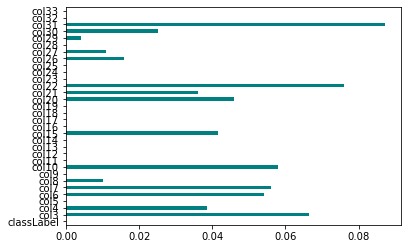

In [21]:
importanes = mutual_info_classif(X,Y)
feat_importanes = pd.Series(importanes, dataset.columns[0:len(dataset.columns)-1])
feat_importanes.plot(kind='barh', color='teal')
plt.show()

- Here got some of the best suggested features by Filter methods.
- 1/3th of the features can be easily filtered from our dataset, which will be added value in terms of most appropriate regression model selection.

In [22]:
df = pd.DataFrame(feat_importanes)
df.columns = ['Values']
df = df.sort_values(by = 'Values', ascending = False)
cm = sns.light_palette("black", as_cmap=True)
df.style.background_gradient(cmap=cm)

,Values
col31,0.087205
col22,0.076013
col3,0.066351
col10,0.057950
col7,0.055952
col6,0.054009
col20,0.045975
col15,0.041600
col4,0.038636
col21,0.036163


- Suggested features based on their weightage are arranged descendingly.

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Values,32.0,0.019567,0.027065,0.0,0.0,0.0,0.039377,0.087205


- Mean value (0.02XX)
- 75%  value (0.04XX)

Here our threshold could be in-between mean and 75% of suggested values
- threshold - 0.03

In [24]:
df = df[df['Values'] > 0.03]  
df = df.sort_values(by = 'Values', ascending = False)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

,Values
col31,0.087205
col22,0.076013
col3,0.066351
col10,0.057950
col7,0.055952
col6,0.054009
col20,0.045975
col15,0.041600
col4,0.038636
col21,0.036163


3 - 0.75 above                                                                  
4 - 0.50 above and 0.75 below                                                              
2 - 0.04 above and 0.50 below                                                              

In [25]:
selected_feat = ['col31','col22','col3','col10','col7','col6','col20','col15']
len(selected_feat)

8

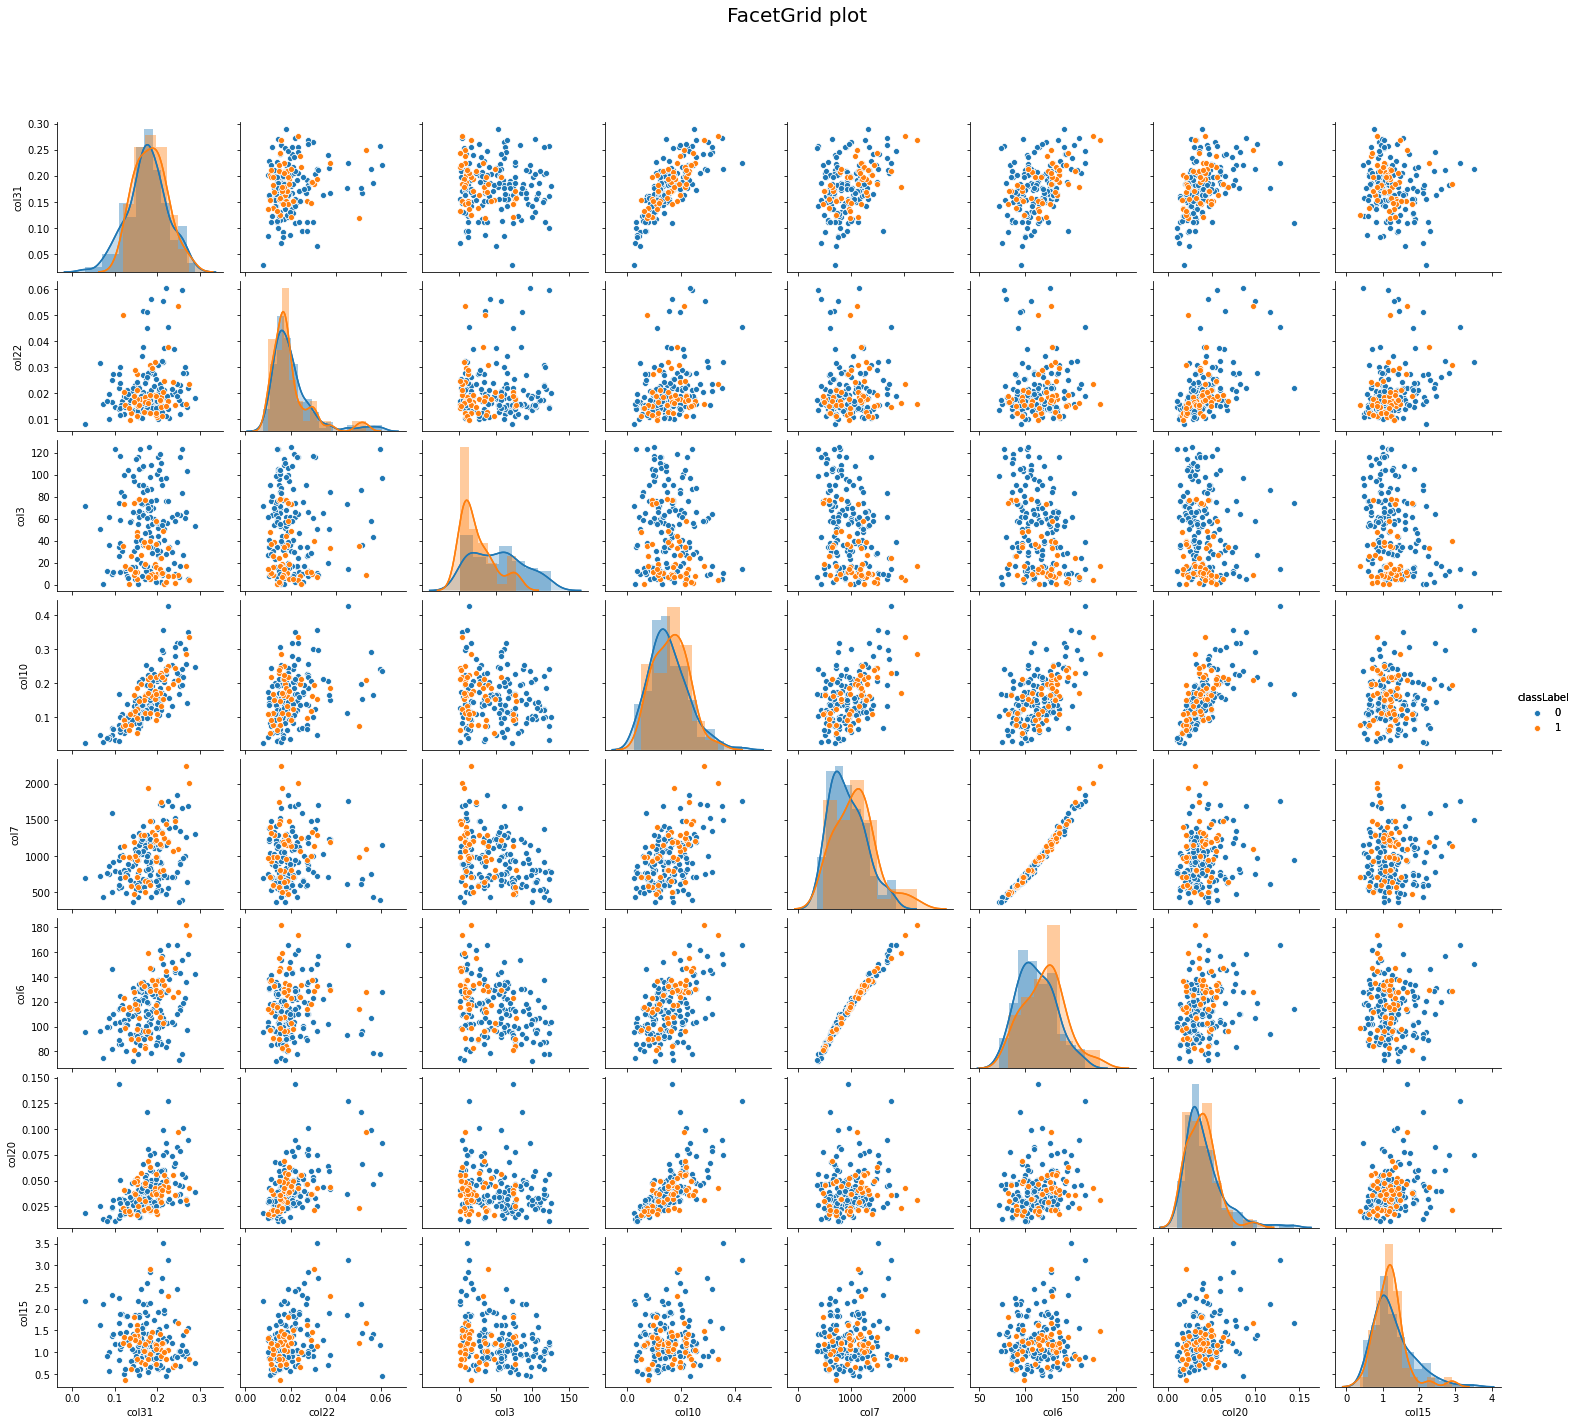

In [26]:
g = sns.pairplot(dataset, vars = selected_feat ,hue = 'classLabel')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## Perform Model building

In [27]:
selected_feat

# preferred by correlation matrix [4, 6, 7, 15, 30]

['col31', 'col22', 'col3', 'col10', 'col7', 'col6', 'col20', 'col15']

Regression

- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Linear Regression
- Support Vector Regression (SVR)
- Decision Tree Regression
- Random Forest Regression

### Multiple Linear Regression


Case 1

In [28]:
#Splitting into Training and Testing Data

X=dataset[selected_feat]
#X=dataset[["col4","col6", "col7" , "col15", "col30"]] 
y=dataset[["PredictLabel2"]]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

multi_lr=LinearRegression()
multi_lr.fit(X_train,y_train)

LinearRegression()

In [31]:
#Prediction
prediction=multi_lr.predict(X_test)

In [32]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  4.089827655203477
MSE:  37.87414406082943
RMSE:  6.1541972718486555


In [33]:
#Training Accuracy
multi_lr.score(X_train,y_train)

0.04575202461006067

Case 2

In [34]:
X=dataset[["col4","col6", "col7" , "col15", "col30"]] 
y=dataset[["PredictLabel2"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

multi_lr=LinearRegression()
multi_lr.fit(X_train,y_train)

LinearRegression()

In [36]:
#Prediction
prediction=multi_lr.predict(X_test)

In [37]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  4.094545812604858
MSE:  38.09620959608881
RMSE:  6.172212698545701


In [38]:
#Training Accuracy
multi_lr.score(X_train,y_train)

0.03536624222620932

### Decision Tree Regression Model

In [39]:
#Splitting into Training and Testing Data

#X=dataset[["col4","col6", "col7" , "col15", "col30"]] 
X = dataset[selected_feat]
Y = dataset[["PredictLabel2"]]

# Fitting the Regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [40]:
# Predicting a new result with the Decision Tree Regression
Y_Pred = regressor.predict(X_test)

In [41]:
regressor.score(X_test,y_test)

1.0

In [42]:
X=dataset[["col4"]]
Y = dataset[["PredictLabel2"]]

# Fitting the Regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

# Predicting a new result with the Decision Tree Regression
Y_Pred = regressor.predict(X_test)

regressor.score(X_test,y_test)

0.953421623618589

In [43]:
#Splitting into Training and Testing Data

X=dataset[["col6"]]
Y = dataset[["PredictLabel2"]]

# Fitting the Regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

# Predicting a new result with the Decision Tree Regression
Y_Pred = regressor.predict(X_test)

regressor.score(X_test,y_test)

0.9039706517047907

In [44]:
X=dataset[["col7"]]
Y = dataset[["PredictLabel2"]]

# Fitting the Regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

# Predicting a new result with the Decision Tree Regression
Y_Pred = regressor.predict(X_test)

regressor.score(X_test,y_test)

0.9032459854817422

In [45]:
X=dataset[["col15"]]
Y = dataset[["PredictLabel2"]]

# Fitting the Regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

# Predicting a new result with the Decision Tree Regression
Y_Pred = regressor.predict(X_test)

regressor.score(X_test,y_test)

0.9418004587155964

In [46]:
X=dataset[["col30"]]
Y = dataset[["PredictLabel2"]]

# Fitting the Regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

# Predicting a new result with the Decision Tree Regression
Y_Pred = regressor.predict(X_test)

regressor.score(X_test,y_test)

0.9998155689329556

### Simple Linear Regression

In [47]:
#Splitting into Training and Testing Data

X = dataset[["col7"]]
Y = dataset[['PredictLabel2']]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [49]:
#Training Accuracy
linreg.score(X_train,y_train)

#Prediction
prediction=linreg.predict(X_test)

In [50]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE:  3.589349980813241
MSE:  25.523636295312457
RMSE:  5.052092269081441


In [51]:
coef=pd.DataFrame()
coef['Features'] = X.columns.values
coef['Coefficients'] = linreg.coef_
coef

,Features,Coefficients
0,col7,0.001297


In [52]:
#Testing Accuracy
linreg.score(X_test,y_test)

-0.020880115485107265

## Perform Model Evaluation

Based on the above observations, we evidenced that 
    
   - Performance, Accuracy score, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error are significantly different while compared with other Regression models.
   - Some of the individual column likely to have some kind of inter connections with our predict Label2.
   - Features selection methods and our observations might differ based on taked Domain or dataset.

Model Evaluation
  - Simple Linear Regression
1. Accuracy level 0.007 (Too poor)


  - Multiple Linear Regression
1. Accuracy level 0.045 (Too poor)
2. Accuracy level 0.035 (Too poor)


  - Decision Tree Regression Model
1. Accuracy level 1.0 (Recommended and overfitting)

Top suggested columns for predicting  predictLabel2 are listed with their score.
1. col30 - 0.99987
2. col7  - 0.99337
3. col6  - 0.90921
4. col15 - 0.83125

col30, col7, col6, and col15 can be used for predicting predictLabel2